# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
from scipy.io import loadmat
from scipy.fft import fft, fftfreq
import pandas as pd
import os
%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.size"] = 16
plt.rcParams["mathtext.fontset"] = "cm"

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState
from Spike_Generation import Spike_Time_Generater
from Spike_Generation import NL
from StimulusnResponse import SSG
from SpatialTemporal_Correlation_and_Convolution import ST_STA
from NGD_TK_AS import NGD2L_TK_AS
from NGD_TK_AS import ParaTrans

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from J_broja_PID.ipynb
importing Jupyter notebook from Spike_Generation.ipynb
importing Jupyter notebook from StimulusnResponse.ipynb
importing Jupyter notebook from SpatialTemporal_Correlation_and_Convolution.ipynb
importing Jupyter notebook from NGD_TK_AS.ipynb


In [3]:
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

In [4]:
def cm2inch(value):
    return value/2.54

# Figsetup

shortcaption: TLMI and TLPI from a iP-RGC and a LC model<br>
label: LPOU

In [5]:
filename = 'LPOU'

# Make and Plot series

In [6]:
Fc_list = [2, 4, 7, 10]

dt = 0.01
tot = 100
LPOU_list = SSG(Fc_list, dt, tot)

In [7]:
T = np.arange(0,tot,dt)
# zo=10
xf = np.linspace(0.0, 0.5/dt, int(len(T)/2))
yf_list = []
zo=10
for LPOU in LPOU_list:
    LPOU = (LPOU-np.mean(LPOU))/np.std(LPOU)*2+10
    yf = np.abs(fft(LPOU))
    yf = 2/len(T) * yf[:(int(len(T)/2))]
#     plt.bar(xf, yf, zorder = zo)
    yf_list.append(yf.copy())
    zo-=1

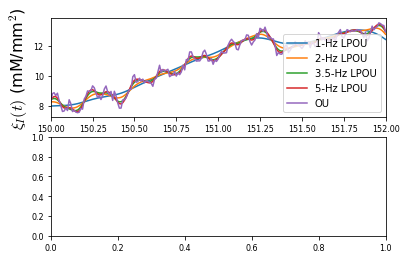

In [8]:
plt.rcParams["font.size"] = 8
fig, ax = plt.subplots(2,1)
for LPOU in LPOU_list:
    LPOU = (LPOU-np.mean(LPOU))/np.std(LPOU)*2+10
    ax[0].plot(150+np.arange(0,2+dt,dt), LPOU[700:901])
ax[0].set_xlabel(r'$t$ (s)', fontsize = 16)
ax[0].set_ylabel(r'$\xi_I(t)$ (mM/mm$^2$)', fontsize = 16)
ax[0].set_xlim([0+150, 2+150])
# plt.xlim([0, 1])
ax[0].legend( ('1-Hz LPOU', '2-Hz LPOU', '3.5-Hz LPOU', '5-Hz LPOU', 'OU'),
           loc='best', prop={'size': 10})
# fig.tight_layout()
# fig.set_size_inches(10, 6)

# Fourier Analysis 

In [9]:
zo=10
for yf in yf_list:
    ax[1].bar(xf[1:], yf[1:], zorder = zo, width = 2*np.mean(np.diff(xf)))
    zo-=1

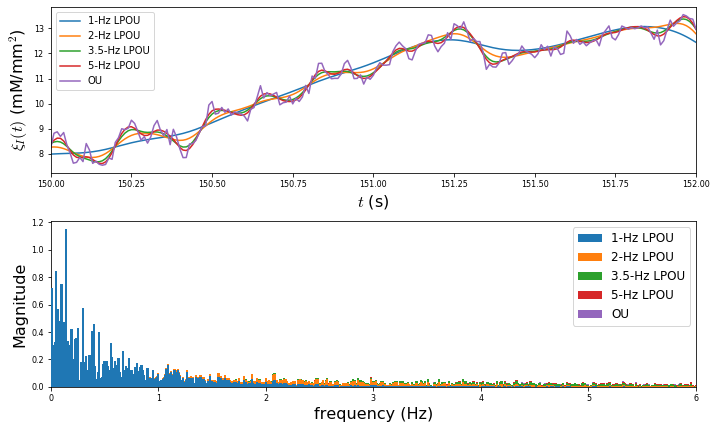

In [17]:
ax[1].set_xlabel('frequency (Hz)', fontsize = 16)
ax[1].set_ylabel('Magnitude', fontsize = 16)
ax[1].set_xlim([0, 6])
# ax[1].set_ylim([0, 1])
ax[1].legend( ('1-Hz LPOU', '2-Hz LPOU', '3.5-Hz LPOU', '5-Hz LPOU', 'OU'),
           loc='best', prop={'size': 12})
fig.tight_layout(h_pad=1)
fig.set_size_inches(10, 6)
fig

In [18]:
# fig = plt.gcf()
fig.savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\M\\'+filename+'.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)